1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)
a=np.random.randint(0,2,20)
a

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

$ z=a^3 +sin(a) $

In [3]:
z=[]
def f(n):
    z.append(n**3+np.sin(n))
    return z
f(a)

[array([1.84147098, 1.84147098, 0.        , 1.84147098, 0.        ,
        1.84147098, 1.84147098, 0.        , 1.84147098, 1.84147098,
        0.        , 1.84147098, 1.84147098, 0.        , 0.        ,
        1.84147098, 0.        , 0.        , 0.        , 0.        ])]

In [4]:
# Rounds to 2 dp and converts list to a 1 dimensional array
b=np.round(z,2)
b=b.reshape(20,)
b

array([1.84, 1.84, 0.  , 1.84, 0.  , 1.84, 1.84, 0.  , 1.84, 1.84, 0.  ,
       1.84, 1.84, 0.  , 0.  , 1.84, 0.  , 0.  , 0.  , 0.  ])

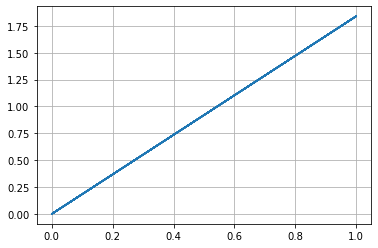

In [5]:
plt.plot(a,b)
plt.grid()

$2$

In [6]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
model1=LogisticRegression()
df1=pd.read_csv("swarm_train_data.csv")
df2=pd.read_csv("swarm_test_data.csv")
df1

C:\Users\ANIEMA E\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
0,-489.28,-658.11,2.51,3.28,0.00,0.00,-0.26,0.35,0.93,-0.37,...,-4.17,0.00,0.00,0.33,0.29,-0.87,-0.50,112,40,1
1,-540.61,-670.93,-1.02,-4.76,0.00,0.00,-0.06,0.44,0.24,-0.97,...,-4.43,0.00,0.00,-0.15,0.41,-0.46,-0.89,112,9,1
2,379.83,-521.18,1.86,7.31,0.00,0.00,0.00,0.00,0.00,0.00,...,1.33,0.00,0.00,0.00,0.00,0.00,0.00,4,0,1
3,888.21,-146.53,-2.67,-18.10,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.19,0.00,0.00,0.00,0.00,0.00,0.00,3,1,0
4,-452.43,-632.15,2.66,-2.63,0.00,0.00,-0.12,0.42,0.01,-1.00,...,2.54,0.00,0.00,0.00,0.00,-1.00,-0.10,112,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18008,-574.72,-176.30,-5.15,-5.88,0.00,0.00,0.00,0.00,0.00,0.00,...,-8.51,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0
18009,-192.91,-997.61,5.70,-0.92,-0.14,-0.29,0.00,0.00,0.19,0.25,...,-2.06,-0.18,-0.27,0.00,0.00,-0.10,0.04,0,0,0
18010,273.54,841.54,-4.74,-5.54,-0.73,-0.69,0.00,0.00,0.51,-0.86,...,5.16,-0.95,0.32,0.00,0.00,-0.86,0.51,6,1,1
18011,1096.38,-270.36,-6.87,-0.65,-0.56,0.03,0.00,0.00,-0.32,0.05,...,-0.18,-0.56,-0.04,0.00,0.00,-0.32,0.03,71,0,1


In [7]:
df2

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,-310.36,94.44,-3.49,-3.04,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.20,-5.30,0.00,0.00,0.00,0.00,0.00,0.00,0,0
1,875.60,645.34,-0.32,8.96,-0.04,1.00,0.00,0.00,-0.04,1.00,...,0.15,9.21,0.02,1.00,0.00,0.00,0.02,1.00,15,5
2,257.97,650.78,6.74,6.57,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.17,14.59,0.00,1.00,0.00,0.00,0.00,0.00,3,0
3,995.13,236.26,-0.76,-4.47,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.37,-2.95,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,-782.80,-163.54,12.69,13.12,-0.19,0.98,0.00,0.00,0.17,-2.67,...,9.68,-1.86,0.69,0.73,0.00,0.00,2.04,-1.74,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,-1400.85,-198.91,-7.46,-2.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.58,-7.05,-0.33,-0.94,0.00,0.00,-0.10,-0.99,3,1
5999,-535.60,-583.25,-11.99,2.31,-0.88,0.48,1.02,1.53,1.25,-2.37,...,-12.36,8.69,0.84,0.55,-3.36,0.43,2.58,0.71,112,15
6000,973.72,110.21,-1.51,-8.88,0.00,0.00,0.00,0.00,0.00,0.00,...,-4.58,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,2,0
6001,1073.24,-844.54,-0.31,8.48,-0.04,1.00,0.00,0.00,-0.04,1.00,...,-0.19,9.33,-0.02,1.00,0.00,0.00,-0.02,1.00,11,2


In [8]:
#First model

X=df1['xVel1']
X=X.values
X=X.reshape(-1,1)
y=df1.iloc[:,-1]
model1.fit(X,y)
model1.score(X,y)

0.6048409482040749

In [9]:
# model1 with more data

X1=df1.loc[:,['x2','xVel2','nAC2','nS2' ]]
X1=X1.values
y=df1.iloc[:,-1]
model1.fit(X1,y)
model1.score(X1,y)

0.7102092932881807

In [10]:
#second model (first hyperparameterized model)

model2=LogisticRegression(random_state=0,solver ='liblinear')
X=df1['xVel1']
X=X.values
X=X.reshape(-1,1)
y=df1.iloc[:,-1]
model2.fit(X,y)
model2.score(X,y)

0.6048409482040749

In [11]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2",'elasticnet','none']}

logreg_cv=GridSearchCV(model1,grid,cv=3)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\mod

C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ANIEMA E\ana

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}


C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ANIEMA E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [12]:
#third model using best parameters from GridSearchCV

model3=LogisticRegression(C= 0.001,penalty='l2')
X=df1['xVel1']
X=X.values
X=X.reshape(-1,1)
y=df1.iloc[:,-1]
model3.fit(X,y)
model3.score(X,y)

0.6050074945872426

In [13]:
#predict class label of test data set using model1

X2=df2.iloc[:,[24,26,34,35]]
X2=X2.values
y_pred=model1.predict(X2)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
#predict class label of test data set using model3

X2=df2.iloc[:,24]
X2=X2.values
X2=X2.reshape(-1,1)
y_pred2=model3.predict(X2)
y2=y_pred2.reshape(-1,1)
y2

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [15]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
#Performance (Accuracy) of model1: my best model

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.604 (0.013)


In [17]:
#confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

NameError: name 'y_test' is not defined

To run the confusion matrix, I need the class label of the test dataset which will act as my y_test. 
Since this is absent in test data set provided, the arguments are not complete to run the code.